/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


number 1 :    loss_train:  [[ 26956.22744496]]    loss_test:  [[ 10830.5872014]]
number 2 :    loss_train:  [[ 14160.10278736]]    loss_test:  [[ 5600.80416378]]
number 3 :    loss_train:  [[ 11837.93178826]]    loss_test:  [[ 4449.56978911]]
number 4 :    loss_train:  [[ 10876.856514]]    loss_test:  [[ 4106.5045333]]
number 5 :    loss_train:  [[ 10170.71980601]]    loss_test:  [[ 3810.48543299]]
number 6 :    loss_train:  [[ 9573.33658159]]    loss_test:  [[ 3573.3377284]]
number 7 :    loss_train:  [[ 9055.78190136]]    loss_test:  [[ 3360.28833804]]
number 8 :    loss_train:  [[ 8605.00200936]]    loss_test:  [[ 3173.57666333]]
number 9 :    loss_train:  [[ 8211.32301756]]    loss_test:  [[ 3007.83725873]]
number 10 :    loss_train:  [[ 7866.70461107]]    loss_test:  [[ 2860.9243588]]
number 11 :    loss_train:  [[ 7564.33302337]]    loss_test:  [[ 2730.31986492]]
number 12 :    loss_train:  [[ 7298.40942235]]    loss_test:  [[ 2614.05444583]]
number 13 :    loss_train:  [[ 7063.9

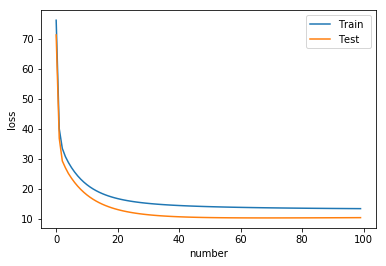

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split

# 读数据
def get_data():
    data = load_svmlight_file("housing.txt")
    return data

# 梯度
def g(w, X_train , y_train):
    g = np.dot(X_train.transpose(), np.dot(X_train, w)) - np.dot( X_train.transpose(),y_train)
    return g

# 画图
def paint(number, loss_train, loss_test):
    plt.plot(loss_train,label='Train ')
    plt.plot(loss_test, label='Test')
    plt.xlabel('number')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    
    X = get_data()[0]
    y = get_data()[1]

    X = X.toarray()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    y_train = y_train.reshape(X_train.shape[0], 1)
    y_test = y_test.reshape(X_test.shape[0], 1) 
    
    w = np.random.random(size = (X_train.shape[1], 1))#初始化
    a = 0.001#学习率
    
    number = 100 # 循环次数
    number_now = 0 # 当前循环次数

    Train = []#cost_train
    Test = []#cost_test

    
    while number_now < number:
        number_now += 1
        w = w - a * (g(w,X_train,y_train))#更新w
        loss_train = 0.5 * (y_train - X_train.dot(w)).transpose().dot((y_train - X_train.dot(w)))
        loss_test = 0.5 * (y_test-X_test.dot(w)).transpose().dot((y_test - X_test.dot(w)))
        Train.append(loss_train[0] /  X_train.shape[0])
        Test.append(loss_test[0] /  X_test.shape[0])
        print('number', number_now, ':',  '   loss_train: ',loss_train, '   loss_test: ',loss_test)
    paint(number,Train,Test)